In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sqlite3

# connect to SQLite database
conn = sqlite3.connect('snic_provincias.db')


In [3]:
# query the database with type wanted
query = """
    SELECT provincia_nombre AS Provincia, anio AS Año, codigo_delito_snic_nombre AS Tipo,
        cantidad_victimas AS Victimas, tasa_victimas AS Tasa
    FROM prov_stats
    WHERE Año = 2022 AND Tipo = 'Homicidios dolosos'
    ORDER BY Tasa DESC
    """

df = pd.read_sql_query(query, conn)
df

,Provincia,Año,Tipo,Victimas,Tasa
0,Santa Fe,2022,Homicidios dolosos,409,11.392761
1,Chubut,2022,Homicidios dolosos,36,5.631212
2,Misiones,2022,Homicidios dolosos,71,5.510386
3,Neuquén,2022,Homicidios dolosos,36,5.288471
4,Formosa,2022,Homicidios dolosos,31,5.043061
5,Tucumán,2022,Homicidios dolosos,82,4.728629
6,Buenos Aires,2022,Homicidios dolosos,740,4.139688
7,Chaco,2022,Homicidios dolosos,49,3.991086
8,Santa Cruz,2022,Homicidios dolosos,14,3.647477
9,Salta,2022,Homicidios dolosos,53,3.631684


### Estimates of Location: key ideas
- The basic metric for location is the mean, but it can be sensitive to extreme
values (outlier).
- Other metrics (median, trimmed mean) are less sensitive to outliers and unusual
distributions and hence are more robust.

In [4]:
# Intentional homicide rate Mean
df['Tasa'].mean()

3.6468058041666667

In [5]:
# Intentional homicide rate Median
df['Tasa'].median()

3.2354219

In [6]:
# Intentional homicide rate Trimmed Mean
# good idea to exclude the Santa Fe outlier
scipy.stats.trim_mean(df['Tasa'], 0.1)

3.3942482849999998

### Estimates of Variability: key ideas
- Variance and standard deviation are the most widespread and routinely reported
statistics of variability.
- Both are sensitive to outliers.
- More robust metrics include mean absolute deviation, median absolute deviation
from the median, and percentiles (quantiles).

In [7]:
# Intentional homicide rate Standard Deviation
df['Tasa'].std()
# variance is the same squared

2.070332627249644

In [8]:
# Intentional homicide rate IQR
# it is not sensitive to the Santa Fe outlier so its smaller than STD
df['Tasa'].quantile(0.75) - df['Tasa'].quantile(0.25) 
# the MAD is calculated in R

1.9102415249999996

### Data distribution: key ideas
- A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of the distribution of the data at a glance.
- A frequency table is a tabular version of the frequency counts found in a histogram.
- A boxplot—with the top and bottom of the box at the 75th and 25th percentiles, respectively—also gives a quick sense of the distribution of the data; it is often used in side-by-side displays to compare distributions.
- A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on the data (multiple estimates are possible, of course).

In [9]:
# Percentiles / quantiles
quantiles = df['Tasa'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
quantiles.to_frame().transpose()

,0.05,0.25,0.50,0.75,0.95
Tasa,1.582775,2.376682,3.235422,4.286923,5.613088


Text(0, 0.5, 'Intentional homicide rate')

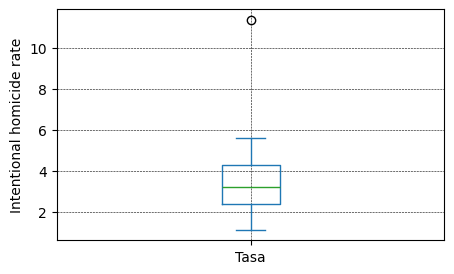

In [10]:
# homicide rate Boxplot
ax = (df['Tasa']).plot.box(figsize=(5,3))
ax.grid(True, linewidth="0.4", color="black", linestyle="--")
ax.set_ylabel('Intentional homicide rate')

The _whiskers_ will not go beyond 1.5 times the IQR. The green line is the median, the top and bottom of the box are the .25 and .75 quantiles. The dot from upside is the Santa Fe outlier.

In [11]:
# homicide rate Frecuency table
freq = pd.cut(df['Tasa'], 5).value_counts() # divide it into 5 equal size segments
freq.to_frame().transpose().sort_index(axis=1)

Tasa,"(1.118, 3.181]","(3.181, 5.234]","(5.234, 7.287]","(7.287, 9.34]","(9.34, 11.393]"
count,12,8,3,0,1


Text(0.5, 0, 'Intentional homicide rate')

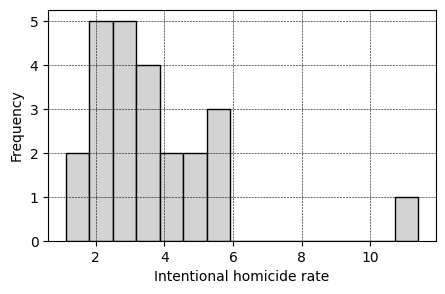

In [12]:
# homicide rate Histogram, showing the frecuency of each interval value
ax = (df['Tasa']).plot.hist(figsize=(5,3), bins=15,
                            color="lightgray", edgecolor="black")
ax.grid(True, linewidth="0.4", color="black", linestyle="--")
ax.set_xlabel("Intentional homicide rate")

Text(0.5, 0, 'Intentional homicide rate')

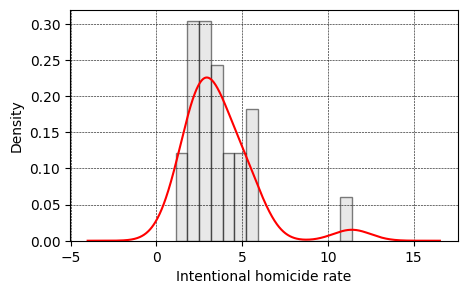

In [13]:
# homicide rate Density plot
ax = (df['Tasa']).plot.hist(density=True, figsize=(5,3), bins=15, 
                            color="lightgray", edgecolor="black", alpha=0.5)
(df['Tasa']).plot.density(ax=ax, color="red")
ax.grid(True, linewidth="0.4", color="black", linestyle="--")
ax.set_xlabel("Intentional homicide rate")

### Binary and Categorical Data: key ideas
- Categorical data is typically summed up in proportions and can be visualized in a bar chart.
- Categories might represent distinct things (different crime categories, male and female, etc), levels of a factor variable (low, medium, and high), or numeric data that has been binned.
- Expected value is the sum of values times their probability of occurrence, often used to sum up factor variable levels

In [14]:
# Select all the crimes categories from CABA
query = """
    SELECT provincia_nombre AS Provincia, anio AS Año, codigo_delito_snic_nombre AS Tipo,
        cantidad_hechos AS Hechos
    FROM prov_stats
    WHERE Año = 2022 AND Tipo LIKE 'Delitos%' AND Provincia = 'CABA'
    """

df = pd.read_sql_query(query, conn)
df

,Provincia,Año,Tipo,Hechos
0,CABA,2022,Delitos contra el honor,40
1,CABA,2022,Delitos contra el estado civil,1
2,CABA,2022,Delitos contra la seguridad pública,683
3,CABA,2022,Delitos contra el orden público,127
4,CABA,2022,Delitos contra la seguridad de la nación,2
5,CABA,2022,Delitos contra los poderes públicos y el orden...,2
6,CABA,2022,Delitos contra la administración pública,1916
7,CABA,2022,Delitos contra la fe pública,629
8,CABA,2022,Delitos migratorios,1
9,CABA,2022,Delitos contra el orden económico y financiero,44


Text(0, 0.5, 'Cantidad de hechos')

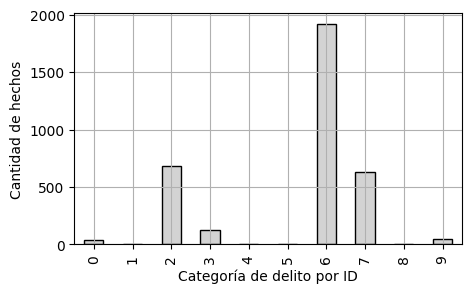

In [15]:
# Crime category bar chart
ax = df['Hechos'].plot.bar(figsize=(5,3), color="lightgray", edgecolor="black")
ax.grid(True)
ax.set_xlabel('Categoría de delito por ID')
ax.set_ylabel('Cantidad de hechos')

# the Mode here is the number 6

In [16]:
# Probabilities
prob = df['Hechos'] / sum(df['Hechos'])
prob.name = 'Probability'
prob.to_frame().transpose()

,0,1,2,3,4,5,6,7,8,9
Probability,0.011611,0.00029,0.198258,0.036865,0.000581,0.000581,0.556168,0.182583,0.00029,0.012772


In [17]:
# Expected value
sum(prob * df['Hechos'])

1321.5851959361391

### Correlation

- The correlation coefficient measures the extent to which two paired variables (e.g., height and weight for individuals) are associated with one another.
- When high values of _v1_ go with high values of _v2_, _v1_ and _v2_ are positively associated.
- When high values of v1 go with low values of _v2_, v1 and _v2_ are negatively associated.
- The correlation coefficient is a standardized metric, so that it always ranges from –1 (perfect negative correlation) to +1 (perfect positive correlation).
- A correlation coefficient of zero indicates no correlation, but be aware that ran‐
dom arrangements of data will produce both positive and negative values for the
correlation coefficient just by chance.

In [18]:
sp500_sym = pd.read_csv('sp500_sectors.csv')
sp500_px = pd.read_csv('sp500_data.csv', index_col=0)

# take telecommunications symbols
telecom_symbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# take data from 07/2012 through 06/2015 of telecom. stocks
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecom_symbols]


# correlation between telecommunication stock returns,
# taking all the data between the two dates
corr = telecom.corr('pearson')
round(corr, 2) # round 2 decimals

,T,CTL,FTR,VZ,LVLT
T,1.00,0.47,0.33,0.68,0.28
CTL,0.47,1.00,0.42,0.42,0.29
FTR,0.33,0.42,1.00,0.29,0.26
VZ,0.68,0.42,0.29,1.00,0.24
LVLT,0.28,0.29,0.26,0.24,1.00


In [31]:
# now focus on exchange-traded funds (ETFs)
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',  sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.columns

Index(['XLI', 'QQQ', 'SPY', 'DIA', 'GLD', 'VXX', 'USO', 'IWM', 'XLE', 'XLY',
       'XLU', 'XLB', 'XTL', 'XLV', 'XLP', 'XLF', 'XLK'],
      dtype='object')

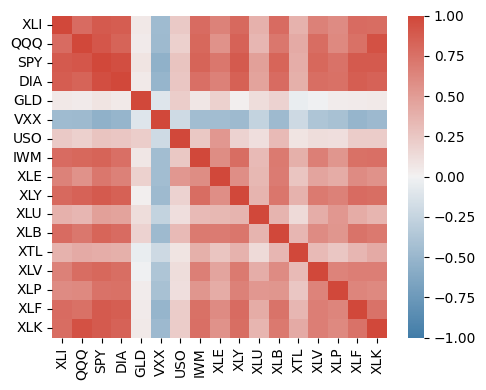

In [59]:

# there are too many columns to read a correlation matrix
# so we can plot the correlation as a heatmap (we use the lib seaborn for this)

import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, # [-1,1] for correlation
                 cmap=sns.diverging_palette(240, 15, as_cmap=True),
                 ax=ax)

plt.tight_layout()

Rank-based correlation coefficients like _Spearman’s rho_ and _Kendall’s tau_ are robust to outliers and handle some nonlinearities. However, _Pearson’s_ correlation is often used for exploratory analysis by data scientists. Rank-based coefficients are typically used for smaller data sets and specific hypothesis tests.

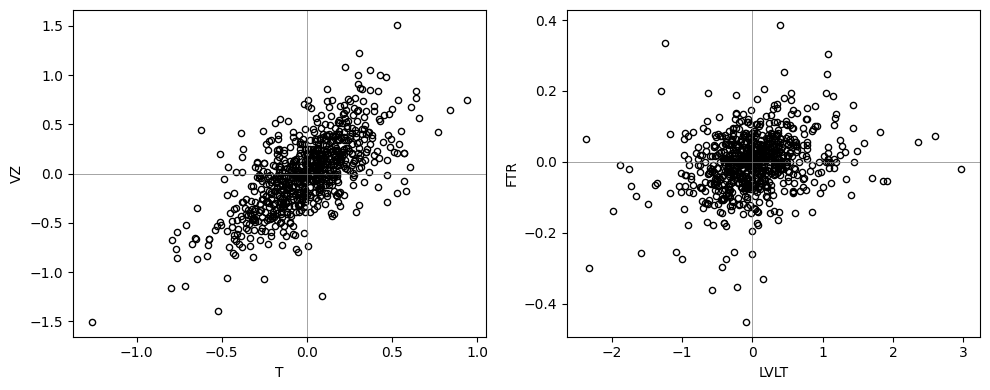

In [99]:
# Scatterplot: to visualize the relationship between two measured data variables
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns for the subplots

# this one is the correlation between the daily returns for ATT and Verizon, which are pretty correlated
ax1 = telecom.plot.scatter(x='T', y='VZ', ax=axes[0], color=(0, 0, 0, 0), edgecolors='black')
ax1.axhline(0, color='grey', lw=0.5)
ax1.axvline(0, color='grey', lw=0.5)

# Plot for LVLT vs. FTR, this is more disperse as they are not so correlated
ax2 = telecom.plot.scatter(x='LVLT', y='FTR', ax=axes[1], color=(0, 0, 0, 0), edgecolors='black')
ax2.axhline(0, color='grey', lw=0.5)
ax2.axvline(0, color='grey', lw=0.5)

plt.tight_layout() 

